### Compare structural measures across datasets

#### Datasets
- NIMHANS
- QPN
- PPMI

#### Measures
- Cortical thickness (FS)
- Regional volumes (FS)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nibabel as nib
from nilearn import datasets, surface, plotting


In [2]:
projects_dir = f"/home/nikhil/projects/Parkinsons/neuro_arch/analysis" 

IDP_dir = f"{projects_dir}/IDP"
figs_dir = f"{projects_dir}/figures/ADPD/poster/"

qpn_release = "Jan_2024"

nimhans_serb_agg_data_dir = f"{IDP_dir}/nimhans_serb/agg_dfs/"
nimhans_metal_agg_data_dir = f"{IDP_dir}/nimhans_metal/agg_dfs/"
nimhans_ylo_agg_data_dir = f"{IDP_dir}/nimhans_ylo/agg_dfs/"

qpn_agg_data_dir = f"{IDP_dir}/qpn/{qpn_release}/agg_dfs/"
ppmi_agg_data_dir = f"{IDP_dir}/ppmi/agg_dfs/"

CT_DKT_csv = "CT_DKT_df.csv"
bilateral_vol_csv = "bilateral_vol_ASEG_df.csv"
global_vol_csv = "global_vol_ASEG_df.csv"

demo_cols = ["participant_id","bids_id","age","sex","group","hemi","ds"]

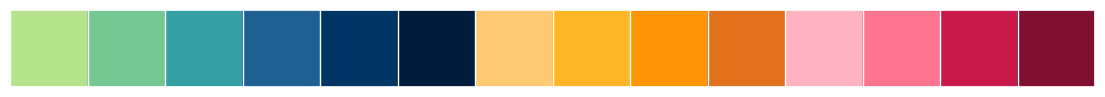

In [24]:
from enum import Enum

# Poster colors
class my_colors(Enum):
    NIM_SERB_CONTROL =  "#B5E48C"
    NIM_SERB_PD =       "#76C893"
    NIM_METAL_CONTROL = "#34A0A4"
    NIM_METAL_PD =      "#1E6091"
    NIM_YLO_CONTROL =   "#003566"
    NIM_YLO_PD =        "#001d3d"

    QPN_CONTROL =       "#ffc971"
    QPN_PD =            "#ffb627"
    QPN_older_CONTROL = "#ff9505"
    QPN_older_PD =      "#e2711d"

    PPMI_CONTROL =      "#FFB3C1"
    PPMI_PD =           "#FF758F"
    PPMI_older_CONTROL= "#C9184A"
    PPMI_older_PD =     "#800F2F"
    

color_list = [  my_colors.NIM_SERB_CONTROL.value, my_colors.NIM_SERB_PD.value,
                my_colors.NIM_METAL_CONTROL.value, my_colors.NIM_METAL_PD.value,
                my_colors.NIM_YLO_CONTROL.value, my_colors.NIM_YLO_PD.value,
                my_colors.QPN_CONTROL.value, my_colors.QPN_PD.value, 
                my_colors.QPN_older_CONTROL.value, my_colors.QPN_older_PD.value,
                my_colors.PPMI_CONTROL.value, my_colors.PPMI_PD.value,
                my_colors.PPMI_older_CONTROL.value, my_colors.PPMI_older_PD.value              
              ]

palette = sns.color_palette(palette=color_list)


color_list = [  my_colors.NIM_SERB_CONTROL.value, my_colors.NIM_SERB_PD.value,
                my_colors.NIM_METAL_CONTROL.value, my_colors.NIM_METAL_PD.value,
                my_colors.NIM_YLO_CONTROL.value, my_colors.NIM_YLO_PD.value,
                my_colors.QPN_CONTROL.value, my_colors.QPN_PD.value, 
                my_colors.PPMI_CONTROL.value, my_colors.PPMI_PD.value,                          
              ]

palette_younger = sns.color_palette(palette=color_list)


color_list_whilte_offset = [  my_colors.NIM_SERB_CONTROL.value, my_colors.NIM_SERB_PD.value,
                my_colors.NIM_METAL_CONTROL.value, my_colors.NIM_METAL_PD.value,
                my_colors.NIM_YLO_CONTROL.value, my_colors.NIM_YLO_PD.value,
                "white",
                my_colors.QPN_CONTROL.value, my_colors.QPN_PD.value, 
                my_colors.QPN_older_CONTROL.value, my_colors.QPN_older_PD.value,
                "white",
                my_colors.PPMI_CONTROL.value, my_colors.PPMI_PD.value,
                my_colors.PPMI_older_CONTROL.value, my_colors.PPMI_older_PD.value              
              ]

palette_whilte_offset = sns.color_palette(palette=color_list_whilte_offset)

hue_order = ["NIMHANS-1-control", "NIMHANS-1-PD", "NIMHANS-2-control", "NIMHANS-2-PD", 
             "NIMHANS-3-control", "NIMHANS-3-PD", "",
             "QPN-young-control", "QPN-young-PD", "QPN-older-control", "QPN-older-PD", "",
             "PPMI-young-control",  "PPMI-young-PD","PPMI-older-control",  "PPMI-older-PD"] 

sns.palplot(palette)

### Read data

In [10]:
match_age = True
age_thresh = 63

In [28]:
# NIMHANS (SERB + METAL)
nimhans_serb_CT_DKT_df = pd.read_csv(f"{nimhans_serb_agg_data_dir}{CT_DKT_csv}").drop(columns=["Unnamed: 0"])
nimhans_serb_CT_DKT_df["ds"] = "NIMHANS-1"
n_nimhans_serb_participants = len(nimhans_serb_CT_DKT_df["participant_id"].unique())

nimhans_metal_CT_DKT_df = pd.read_csv(f"{nimhans_metal_agg_data_dir}{CT_DKT_csv}").drop(columns=["Unnamed: 0"])
nimhans_metal_CT_DKT_df["ds"] = "NIMHANS-2"
n_nimhans_metal_participants = len(nimhans_metal_CT_DKT_df["participant_id"].unique())

nimhans_ylo_CT_DKT_df = pd.read_csv(f"{nimhans_ylo_agg_data_dir}{CT_DKT_csv}") #.drop(columns=["Unnamed: 0"])
nimhans_ylo_CT_DKT_df["ds"] = "NIMHANS-3"
n_nimhans_ylo_participants = len(nimhans_ylo_CT_DKT_df["participant_id"].unique())

# QPN
qpn_CT_DKT_df = pd.read_csv(f"{qpn_agg_data_dir}{CT_DKT_csv}") #.drop(columns=["Unnamed: 0"])
qpn_CT_DKT_df["ds"] = "QPN"
n_qpn_participants = len(qpn_CT_DKT_df["participant_id"].unique())

# PPMI
ppmi_CT_DKT_df = pd.read_csv(f"{ppmi_agg_data_dir}{CT_DKT_csv}").drop(columns=["Unnamed: 0"])
ppmi_CT_DKT_df["ds"] = "PPMI"
ppmi_CT_DKT_df["participant_id"] = ppmi_CT_DKT_df["participant_id"].astype(str)
ppmi_CT_DKT_df["bids_id"] = "sub-" + ppmi_CT_DKT_df["participant_id"]

n_ppmi_participants = len(ppmi_CT_DKT_df["participant_id"].unique())

print(f"n_nimhans_participants: {(n_nimhans_serb_participants, n_nimhans_metal_participants)}, n_qpn_participants (all):{n_qpn_participants}, n_ppmi_participants: {n_ppmi_participants}")

if match_age:
    print(f"Matching age < {age_thresh}")
    qpn_young_CT_DKT_df = qpn_CT_DKT_df[qpn_CT_DKT_df["age"] < age_thresh].copy()
    qpn_young_CT_DKT_df["ds"] = "QPN-young"

    qpn_older_CT_DKT_df = qpn_CT_DKT_df[qpn_CT_DKT_df["age"] >= age_thresh].copy()
    qpn_older_CT_DKT_df["ds"] = "QPN-older"

    ppmi_young_CT_DKT_df = ppmi_CT_DKT_df[ppmi_CT_DKT_df["age"] < age_thresh].copy()
    ppmi_young_CT_DKT_df["ds"] = "PPMI-young"

    ppmi_older_CT_DKT_df = ppmi_CT_DKT_df[ppmi_CT_DKT_df["age"] >= age_thresh].copy()
    ppmi_older_CT_DKT_df["ds"] = "PPMI-older"

    n_qpn_young_participants = len(qpn_young_CT_DKT_df["participant_id"].unique())
    n_qpn_older_participants = len(qpn_older_CT_DKT_df["participant_id"].unique())

    n_ppmi_young_participants = len(ppmi_young_CT_DKT_df["participant_id"].unique())
    n_ppmi_older_participants = len(ppmi_older_CT_DKT_df["participant_id"].unique())

    print(f"n_nimhans_participants: {(n_nimhans_serb_participants, n_nimhans_metal_participants, n_nimhans_ylo_participants)}")
    print(f"n_qpn_participants (young):{n_qpn_young_participants}, n_ppmi_participants (young): {n_ppmi_young_participants}")
    print(f"n_qpn_participants (older):{n_qpn_older_participants}, n_ppmi_participants: {n_ppmi_older_participants}")

# Concat
CT_DKT_df = pd.concat([nimhans_serb_CT_DKT_df, nimhans_metal_CT_DKT_df, nimhans_ylo_CT_DKT_df,
                        qpn_young_CT_DKT_df, qpn_older_CT_DKT_df,
                        ppmi_young_CT_DKT_df, ppmi_older_CT_DKT_df], axis=0) 


CT_DKT_df["ds-group"] = CT_DKT_df["ds"] + "-" + CT_DKT_df["group"]
CT_DKT_df["ds-hemi"] = CT_DKT_df["ds"] + "\n" + CT_DKT_df["hemi"]
print(f"CT_DKT_df shape: {CT_DKT_df.shape}, n_total_participants: {len(CT_DKT_df['participant_id'].unique())}")


CT_DKT_df.head()

n_nimhans_participants: (86, 130), n_qpn_participants (all):286, n_ppmi_participants: 406
Matching age < 63
n_nimhans_participants: (86, 130, 237)
n_qpn_participants (young):95, n_ppmi_participants (young): 195
n_qpn_participants (older):165, n_ppmi_participants: 210
CT_DKT_df shape: (2236, 40), n_total_participants: 1118


,caudalanteriorcingulate,caudalmiddlefrontal,cuneus,entorhinal,fusiform,inferiorparietal,inferiortemporal,insula,isthmuscingulate,lateraloccipital,...,transversetemporal,participant_id,bids_id,age,sex,group,hemi,ds,ds-group,ds-hemi
0,2.643,2.648,1.866,3.932,3.098,2.638,2.969,3.294,2.312,2.189,...,2.386,SERB088,sub-SERB088,54.0,M,PD,lh,NIMHANS-1,NIMHANS-1-PD,NIMHANS-1\nlh
1,3.230,2.844,1.941,3.825,2.900,2.479,3.003,3.427,2.308,2.365,...,1.971,SERB058,sub-SERB058,64.0,M,PD,lh,NIMHANS-1,NIMHANS-1-PD,NIMHANS-1\nlh
2,2.756,2.717,1.997,3.036,2.709,2.457,2.875,3.183,2.388,2.123,...,1.875,SERB049,sub-SERB049,62.0,M,PD,lh,NIMHANS-1,NIMHANS-1-PD,NIMHANS-1\nlh
3,2.974,2.603,1.819,3.802,2.701,2.399,2.947,3.205,2.468,2.364,...,2.250,SERB084,sub-SERB084,NaN,NaN,PD,lh,NIMHANS-1,NIMHANS-1-PD,NIMHANS-1\nlh
4,3.015,2.939,1.998,4.177,3.054,2.831,3.403,3.701,2.462,2.382,...,2.776,SERB063,sub-SERB063,56.0,M,PD,lh,NIMHANS-1,NIMHANS-1-PD,NIMHANS-1\nlh


### Subsample QPN to match age

In [29]:
CT_DKT_df.groupby(["ds","group","hemi"])["age"].describe()

count       mean        std    min      25%  \
ds         group     hemi                                                
NIMHANS-1  PD        lh     54.0  55.388889   7.199100  36.00  50.2500   
                     rh     54.0  55.388889   7.199100  36.00  50.2500   
           control   lh     15.0  52.000000   6.011893  41.00  49.0000   
                     rh     15.0  52.000000   6.011893  41.00  49.0000   
NIMHANS-2  PD        lh     59.0  53.644068  10.133187  24.00  46.0000   
                     rh     59.0  53.644068  10.133187  24.00  46.0000   
           control   lh     64.0  50.015625  10.418988  20.00  42.7500   
                     rh     64.0  50.015625  10.418988  20.00  42.7500   
NIMHANS-3  PD        lh    198.0  54.075758  10.983574  23.00  47.2500   
                     rh    198.0  54.075758  10.983574  23.00  47.2500   
           control   lh     37.0  44.148649  11.493274  25.00  35.0000   
                     rh     37.0  44.148649  11.493274  25.00  35.0000   
PPMI-older PD        lh    124.0  69.516129   4.591409  63.00  65.0000   
                     rh    124.0  69.516129   4.591409  63.00  65.0000   
           control   lh     37.0  68.972973   5.041420  63.00  65.0000   
                     rh     37.0  68.972973   5.041420  63.00  65.0000   
           prodromal lh     49.0  68.877551   5.105686  63.00  65.0000   
                     rh     49.0  68.877551   5.105686  63.00  65.0000   
PPMI-young PD        lh    105.0  54.247619   5.705566  38.00  50.0000   
                     rh    105.0  54.247619   5.705566  38.00  50.0000   
           control   lh     42.0  51.642857   7.938242  31.00  46.2500   
                     rh     42.0  51.642857   7.938242  31.00  46.2500   
           prodromal lh     48.0  56.187500   4.451422  42.00  53.7500   
                     rh     48.0  56.187500   4.451422  42.00  53.7500   
QPN-older  PD        lh    130.0  70.873692   5.539917  63.23  65.9975   
                     rh    130.0  70.873692   5.539917  63.23  65.9975   
           control   lh     35.0  70.032571   4.917366  63.14  66.9350   
                     rh     35.0  70.032571   4.917366  63.14  66.9350   
QPN-young  PD        lh     68.0  55.809559   4.971906  40.83  53.0375   
                     rh     68.0  55.809559   4.971906  40.83  53.0375   
           control   lh     27.0  51.308519   9.071232  25.98  45.8050   
                     rh     27.0  51.308519   9.071232  25.98  45.8050   

                              50%     75%    max  
ds         group     hemi                         
NIMHANS-1  PD        lh    56.000  61.000  67.00  
                     rh    56.000  61.000  67.00  
           control   lh    53.000  56.500  60.00  
                     rh    53.000  56.500  60.00  
NIMHANS-2  PD        lh    55.000  61.000  72.00  
                     rh    55.000  61.000  72.00  
           control   lh    50.000  57.250  73.00  
                     rh    50.000  57.250  73.00  
NIMHANS-3  PD        lh    55.000  62.000  78.00  
                     rh    55.000  62.000  78.00  
           control   lh    46.000  52.000  65.00  
                     rh    46.000  52.000  65.00  
PPMI-older PD        lh    69.000  73.000  82.00  
                     rh    69.000  73.000  82.00  
           control   lh    68.000  72.000  81.00  
                     rh    68.000  72.000  81.00  
           prodromal lh    68.000  72.000  84.00  
                     rh    68.000  72.000  84.00  
PPMI-young PD        lh    55.000  59.000  62.00  
                     rh    55.000  59.000  62.00  
           control   lh    53.500  57.750  62.00  
                     rh    53.500  57.750  62.00  
           prodromal lh    57.000  60.000  62.00  
                     rh    57.000  60.000  62.00  
QPN-older  PD        lh    69.645  74.595  88.34  
                     rh    69.645  74.595  88.34  
           control   lh    68.560  71.640  82.84  
                     rh    68.5

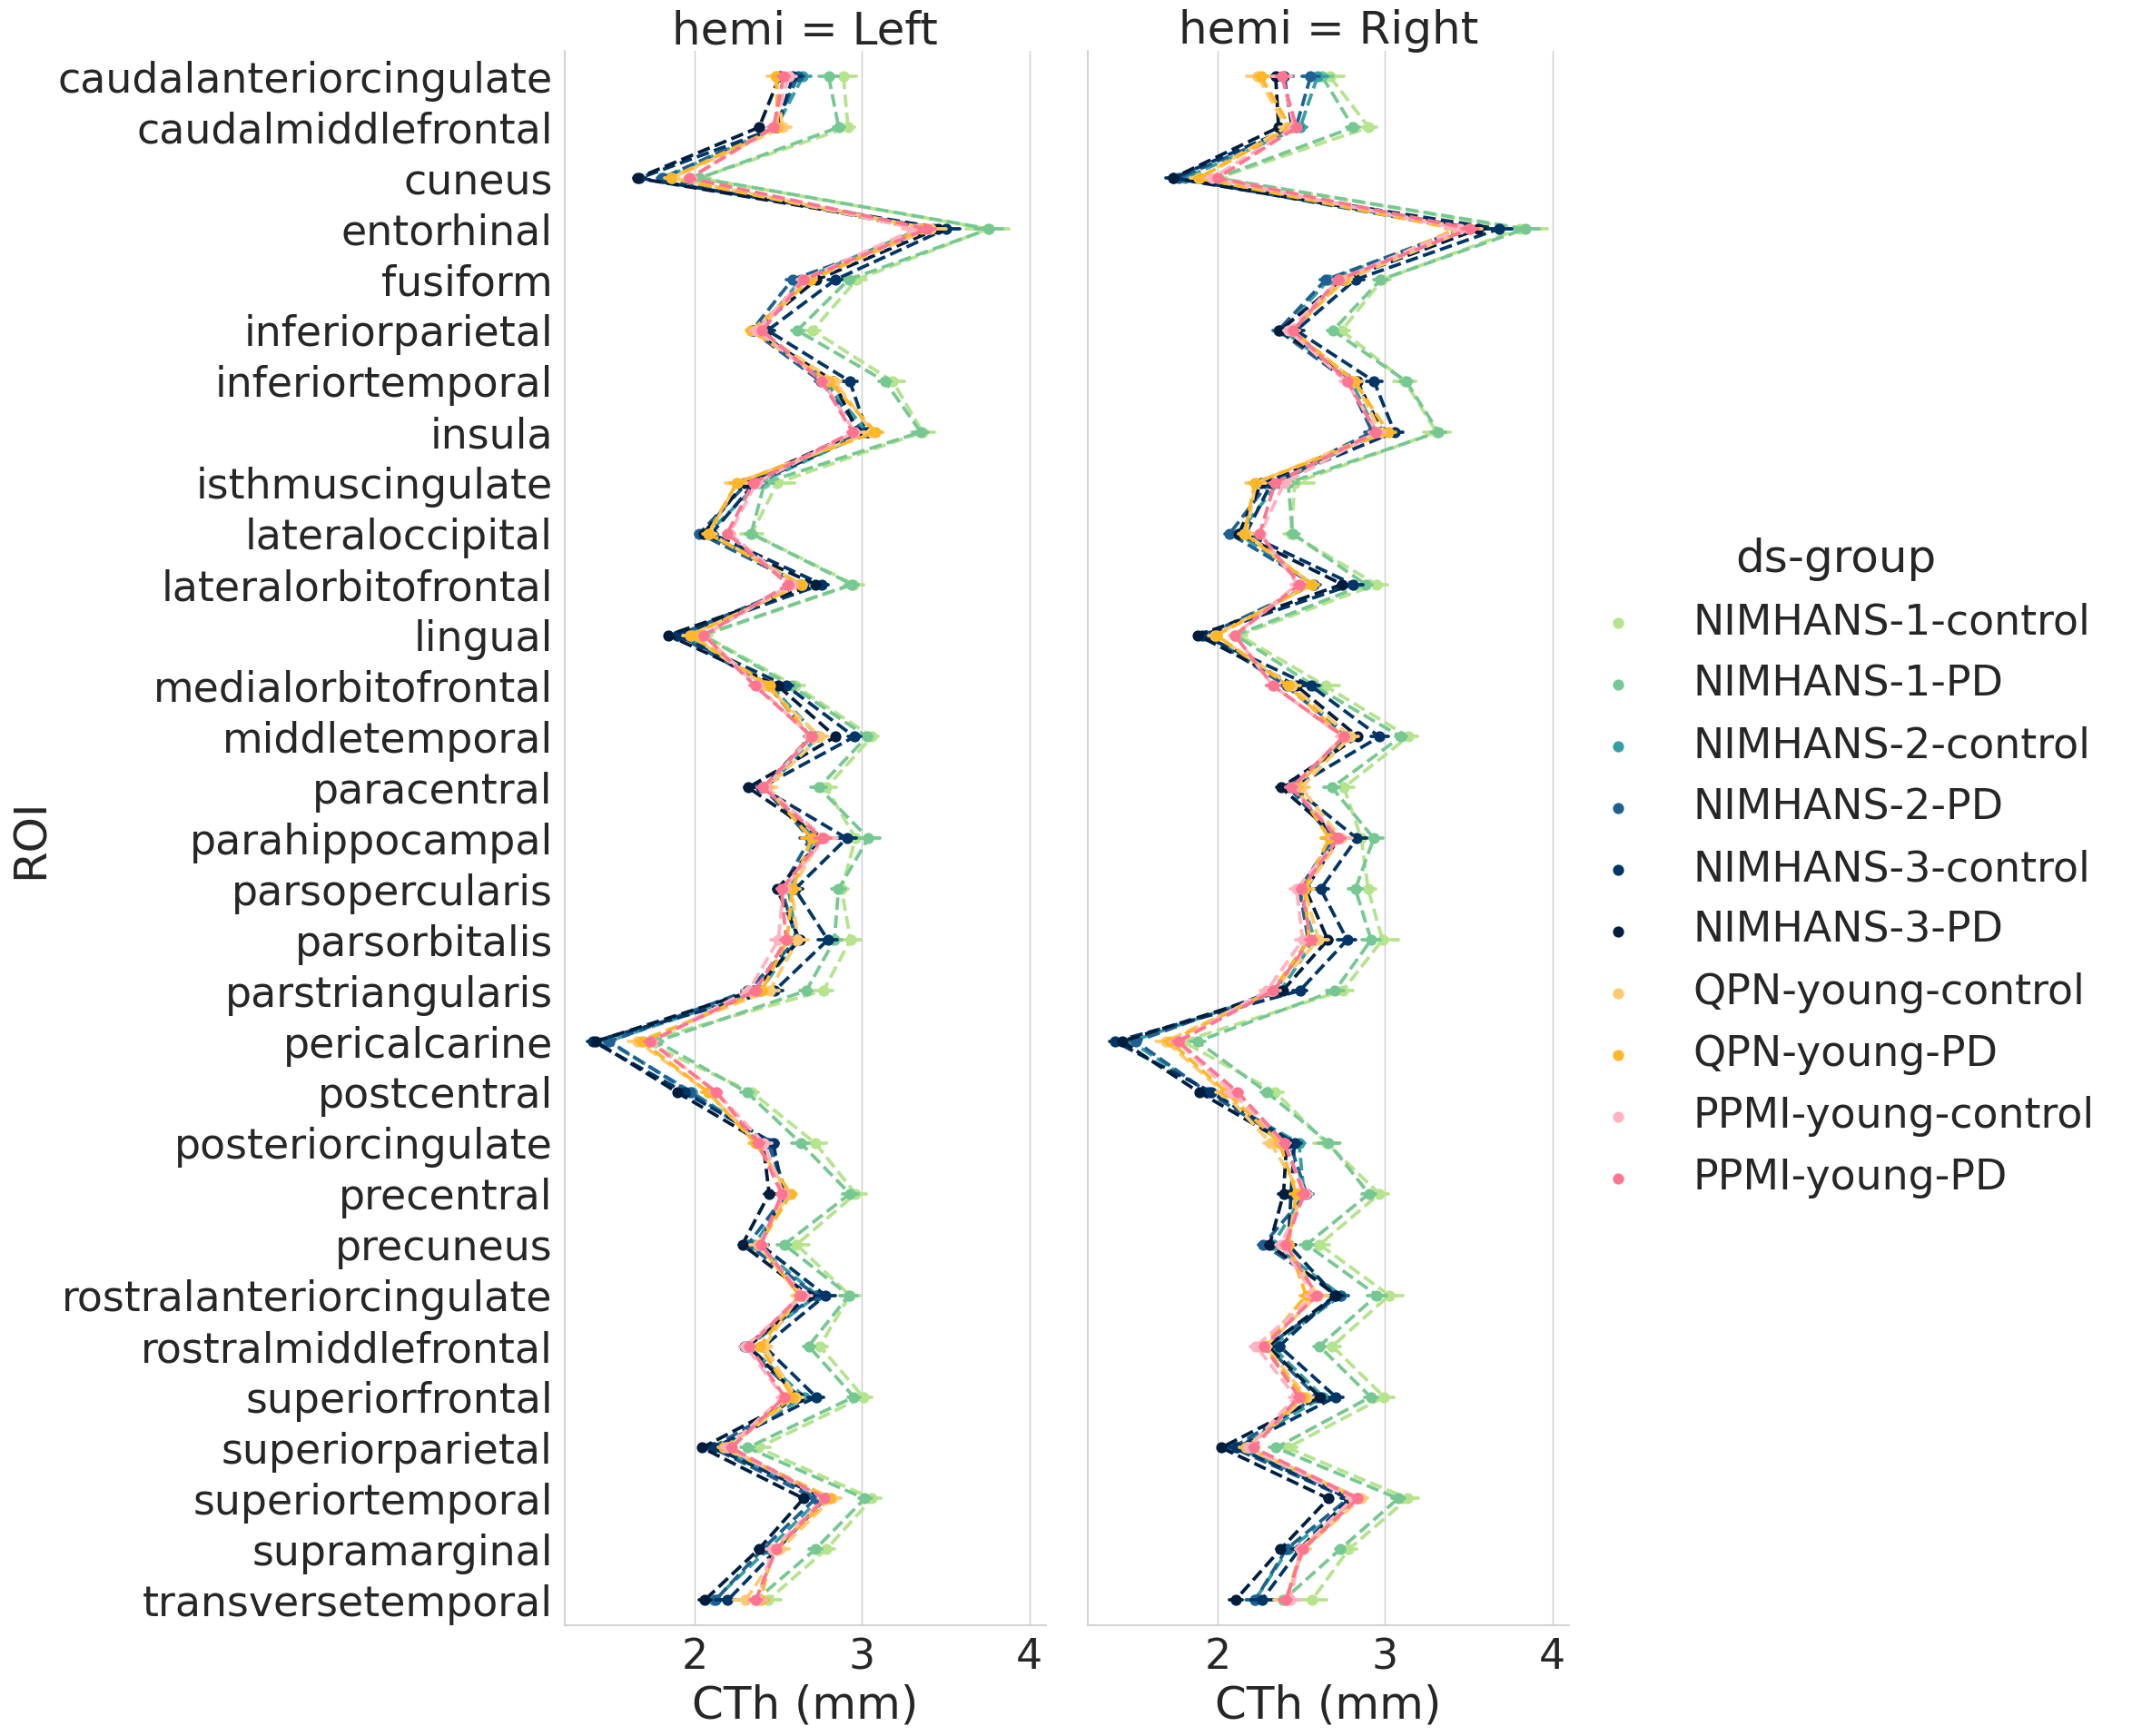

In [32]:
save_fig = True

CT_DKT_df = CT_DKT_df[CT_DKT_df["group"].isin(["control", "PD"])]


hue_order = ["NIMHANS-1-control", "NIMHANS-1-PD", "NIMHANS-2-control", "NIMHANS-2-PD", "NIMHANS-3-control", "NIMHANS-3-PD",
             "QPN-young-control", "QPN-young-PD", #"QPN-older-control", "QPN-older-PD", 
             "PPMI-young-control",  "PPMI-young-PD", #"PPMI-older-control",  "PPMI-older-PD"
             ]

CT_DKT_df_melt = CT_DKT_df.melt(
    id_vars=demo_cols + ["ds-group","ds-hemi"],
    var_name="ROI", 
    value_name="CTh (mm)")

plot_df = CT_DKT_df_melt.copy()
plot_df["hemi"] = plot_df["hemi"].replace({"lh":"Left", "rh":"Right"})
plot_df["ROI"] = plot_df["ROI"].astype(str)

sns.set_theme(font_scale=3)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y="ROI",x="CTh (mm)", hue="ds-group", col="hemi",kind="point",palette=palette_younger, hue_order=hue_order, legend=True,
                    data=plot_df, aspect=0.5, height=20, linestyles="--", dodge=False, scale=1)
    # g.tick_params(axis='x', rotation=90, labelsize=14)

if save_fig:
    print(f"Saving figure to {figs_dir}/DKT_point.png")
    g.savefig(f"{figs_dir}/DKT_point.png")

In [33]:
# save_fig = False

# # CT_DKT_df = CT_DKT_df[CT_DKT_df["dataset"].isin(["PPMI", "QPN", "NIMHANS_SERB"])]
# CT_DKT_df = CT_DKT_df[CT_DKT_df["group"].isin(["control", "PD"])]

# color_list = [  "#969696", "#e7298a" ]

# palette_group = sns.color_palette(palette=color_list)

# CT_DKT_df_melt = CT_DKT_df.melt(
#     id_vars=demo_cols + ["ds_group","ds_hemi"],
#     var_name="ROI", 
#     value_name="CTh (mm)")

# plot_df = CT_DKT_df_melt.copy()
# plot_df["ROI"] = plot_df["ROI"].astype(str)



# sns.set_theme(font_scale=4)
# with sns.axes_style("whitegrid"):
#     g = sns.catplot(y="ROI",x="CTh (mm)", hue="group", col="ds_hemi", kind="box",palette=palette_group, legend=True,
#                     data=plot_df, aspect=0.2, height=30)
#     # g.tick_params(axis='x', rotation=90, labelsize=14)

# if save_fig:
#     g.savefig(f"{figs_dir}/DKT.png")

### Aseg bilateral volume

In [51]:
FS_version_name_map = {"Thalamus": "Thalamus-Proper"}

In [56]:
# NIMHANS (SERB + METAL)
nimhans_serb_hemi_ASEG_df = pd.read_csv(f"{nimhans_serb_agg_data_dir}{bilateral_vol_csv}").drop(columns=["Unnamed: 0"])
nimhans_serb_hemi_ASEG_df["ds"] = "NIMHANS-1"
n_nimhans_serb_participants = len(nimhans_serb_hemi_ASEG_df["participant_id"].unique())

nimhans_metal_hemi_ASEG_df = pd.read_csv(f"{nimhans_metal_agg_data_dir}{bilateral_vol_csv}").drop(columns=["Unnamed: 0"])
nimhans_metal_hemi_ASEG_df["ds"] = "NIMHANS-2"
n_nimhans_metal_participants = len(nimhans_metal_hemi_ASEG_df["participant_id"].unique())

nimhans_ylo_hemi_ASEG_df = pd.read_csv(f"{nimhans_ylo_agg_data_dir}{bilateral_vol_csv}") #.drop(columns=["Unnamed: 0"])
nimhans_ylo_hemi_ASEG_df["ds"] = "NIMHANS-3"
n_nimhans_ylo_participants = len(nimhans_ylo_hemi_ASEG_df["participant_id"].unique())
# Rename columns (FS7.1) # Need to update this for other datasets
nimhans_ylo_hemi_ASEG_df = nimhans_ylo_hemi_ASEG_df.rename(columns=FS_version_name_map)

# QPN
qpn_hemi_ASEG_df = pd.read_csv(f"{qpn_agg_data_dir}{bilateral_vol_csv}") #.drop(columns=["Unnamed: 0"])
qpn_hemi_ASEG_df["ds"] = "QPN"
n_qpn_participants = len(qpn_hemi_ASEG_df["participant_id"].unique())
# Rename columns (FS7.1) # Need to update this for other datasets
qpn_hemi_ASEG_df = qpn_hemi_ASEG_df.rename(columns=FS_version_name_map)


# PPMI
ppmi_hemi_ASEG_df = pd.read_csv(f"{ppmi_agg_data_dir}{bilateral_vol_csv}").drop(columns=["Unnamed: 0"])
ppmi_hemi_ASEG_df["ds"] = "PPMI"
n_ppmi_participants = len(ppmi_hemi_ASEG_df["participant_id"].unique())

print(f"n_nimhans_participants: {(n_nimhans_serb_participants,n_nimhans_metal_participants, n_nimhans_ylo_participants)}, n_qpn_participants:{n_qpn_participants}")

if match_age:
    print(f"Matching age < {age_thresh}")

    ppmi_younger_hemi_ASEG_df = ppmi_hemi_ASEG_df[ppmi_hemi_ASEG_df["age"] < age_thresh].copy()
    ppmi_younger_hemi_ASEG_df["ds"] = "PPMI-young"
    n_younger_ppmi_participants = len(ppmi_younger_hemi_ASEG_df["participant_id"].unique())

    ppmi_older_hemi_ASEG_df = ppmi_hemi_ASEG_df[ppmi_hemi_ASEG_df["age"] >= age_thresh].copy()
    ppmi_older_hemi_ASEG_df["ds"] = "PPMI-older"
    n_older_ppmi_participants = len(ppmi_older_hemi_ASEG_df["participant_id"].unique())

    qpn_younger_hemi_ASEG_df = qpn_hemi_ASEG_df[qpn_hemi_ASEG_df["age"] < age_thresh].copy()
    qpn_younger_hemi_ASEG_df["ds"] = "QPN-young"
    n_qpn_younger_participants = len(qpn_younger_hemi_ASEG_df["participant_id"].unique())

    qpn_older_hemi_ASEG_df = qpn_hemi_ASEG_df[qpn_hemi_ASEG_df["age"] >= age_thresh].copy()
    qpn_older_hemi_ASEG_df["ds"] = "QPN-older"
    n_qpn_older_participants = len(qpn_older_hemi_ASEG_df["participant_id"].unique())

    print(f"n_nimhans_participants: {(n_nimhans_serb_participants,n_nimhans_metal_participants, n_nimhans_ylo_participants)}")
    print(f"n_qpn_younger_participants:{n_qpn_younger_participants}, n_qpn_older_participants: {n_qpn_older_participants}")
    print(f"n_ppmi_younger_participants:{n_younger_ppmi_participants}, n_ppmi_older_participants: {n_older_ppmi_participants}")

# Concat
hemi_ASEG_df = pd.concat([nimhans_serb_hemi_ASEG_df, nimhans_metal_hemi_ASEG_df, nimhans_ylo_hemi_ASEG_df,
                          qpn_younger_hemi_ASEG_df, qpn_older_hemi_ASEG_df,
                          ppmi_younger_hemi_ASEG_df, ppmi_older_hemi_ASEG_df], axis=0)
hemi_ASEG_df["ds_group"] = hemi_ASEG_df["ds"] + "-" + hemi_ASEG_df["group"]
hemi_ASEG_df["ds_hemi"] = hemi_ASEG_df["ds"] + "\n" + hemi_ASEG_df["hemi"]
print(f"hemi_ASEG_df shape: {hemi_ASEG_df.shape}")

hemi_ASEG_df = hemi_ASEG_df[hemi_ASEG_df["group"]!="prodromal"].copy()

## Remove outliers
## This is structure specific (need to be QCed visually)
hemi_roi_list = ['Pallidum', 'Thalamus-Proper', 'Putamen',  'Amygdala', 'Caudate', 'Hippocampus', 'Accumbens-area', 
                 'Lateral-Ventricle']
min_vol_thresh_list = [1000,5000,2000,750,1500,2000,200,1000]
max_vol_thresh_list = [3000,10000,7000,2500,5500,6000,1000,50000]
outlier_min_thesh_dict = dict(zip(hemi_roi_list, min_vol_thresh_list))
outlier_max_thesh_dict = dict(zip(hemi_roi_list, max_vol_thresh_list))

remove_outliers = True
if remove_outliers:
    print("Removing outliers")
    for roi, thresh in outlier_min_thesh_dict.items():
        n_participants = hemi_ASEG_df["bids_id"].nunique()
        print(f"roi: {roi}, n_participants: {n_participants}")
        hemi_ASEG_df = hemi_ASEG_df[hemi_ASEG_df[roi] > thresh].copy()
        n_participants = hemi_ASEG_df["bids_id"].nunique()
        print(f"n_participants after outlier removal: {n_participants}")

    for roi, thresh in outlier_max_thesh_dict.items():
        n_participants = hemi_ASEG_df["bids_id"].nunique()
        print(f"roi: {roi}, n_participants: {n_participants}")
        hemi_ASEG_df = hemi_ASEG_df[hemi_ASEG_df[roi] < thresh].copy()
        n_participants = hemi_ASEG_df["bids_id"].nunique()
        print(f"n_participants after outlier removal: {n_participants}")


hemi_ASEG_df.head()

n_nimhans_participants: (86, 130, 237), n_qpn_participants:287
Matching age < 63
n_nimhans_participants: (86, 130, 237)
n_qpn_younger_participants:95, n_qpn_older_participants: 166
n_ppmi_younger_participants:195, n_ppmi_older_participants: 210
hemi_ASEG_df shape: (2238, 28)
Removing outliers
roi: Pallidum, n_participants: 453
n_participants after outlier removal: 453
roi: Thalamus-Proper, n_participants: 453
n_participants after outlier removal: 450
roi: Putamen, n_participants: 450
n_participants after outlier removal: 450
roi: Amygdala, n_participants: 450
n_participants after outlier removal: 450
roi: Caudate, n_participants: 450
n_participants after outlier removal: 450
roi: Hippocampus, n_participants: 450
n_participants after outlier removal: 450
roi: Accumbens-area, n_participants: 450
n_participants after outlier removal: 449
roi: Lateral-Ventricle, n_participants: 449
n_participants after outlier removal: 449
roi: Pallidum, n_participants: 449
n_participants after outlier rem

,Cerebellum-White-Matter,Amygdala,Lateral-Ventricle,Cerebellum-Cortex,Putamen,Thalamus-Proper,vessel,choroid-plexus,Caudate,Hippocampus,...,group,hemi,ds,WM-hypointensities,non-WM-hypointensities,CerebralWhiteMatter,Cortex,SurfaceHoles,ds_group,ds_hemi
0,14102.900391,1659.300049,9170.500000,49608.800781,4586.500000,6357.399902,125.800003,684.400024,3355.899902,3580.399902,...,PD,lh,NIMHANS-1,NaN,NaN,NaN,NaN,NaN,NIMHANS-1-PD,NIMHANS-1\nlh
2,20009.800781,1357.099976,16945.599609,50561.199219,4779.700195,6195.899902,29.299999,1066.400024,3021.699951,3541.500000,...,PD,lh,NIMHANS-1,NaN,NaN,NaN,NaN,NaN,NIMHANS-1-PD,NIMHANS-1\nlh
3,10348.900391,1344.599976,10064.700195,41859.898438,2910.699951,5412.100098,13.900000,818.299988,1672.599976,3827.000000,...,PD,lh,NIMHANS-1,NaN,NaN,NaN,NaN,NaN,NIMHANS-1-PD,NIMHANS-1\nlh
4,11251.599609,1442.900024,8531.599609,46157.500000,3410.100098,5824.899902,40.000000,592.799988,2352.199951,3377.800049,...,PD,lh,NIMHANS-1,NaN,NaN,NaN,NaN,NaN,NIMHANS-1-PD,NIMHANS-1\nlh
5,13945.700195,1570.699951,5322.200195,41812.800781,5053.700195,6990.500000,43.400002,490.700012,2814.300049,3485.300049,...,PD,lh,NIMHANS-1,NaN,NaN,NaN,NaN,NaN,NIMHANS-1-PD,NIMHANS-1\nlh


Saving figure to /home/nikhil/projects/Parkinsons/neuro_arch/analysis/figures/ADPD/poster//ASEG_hemi.png


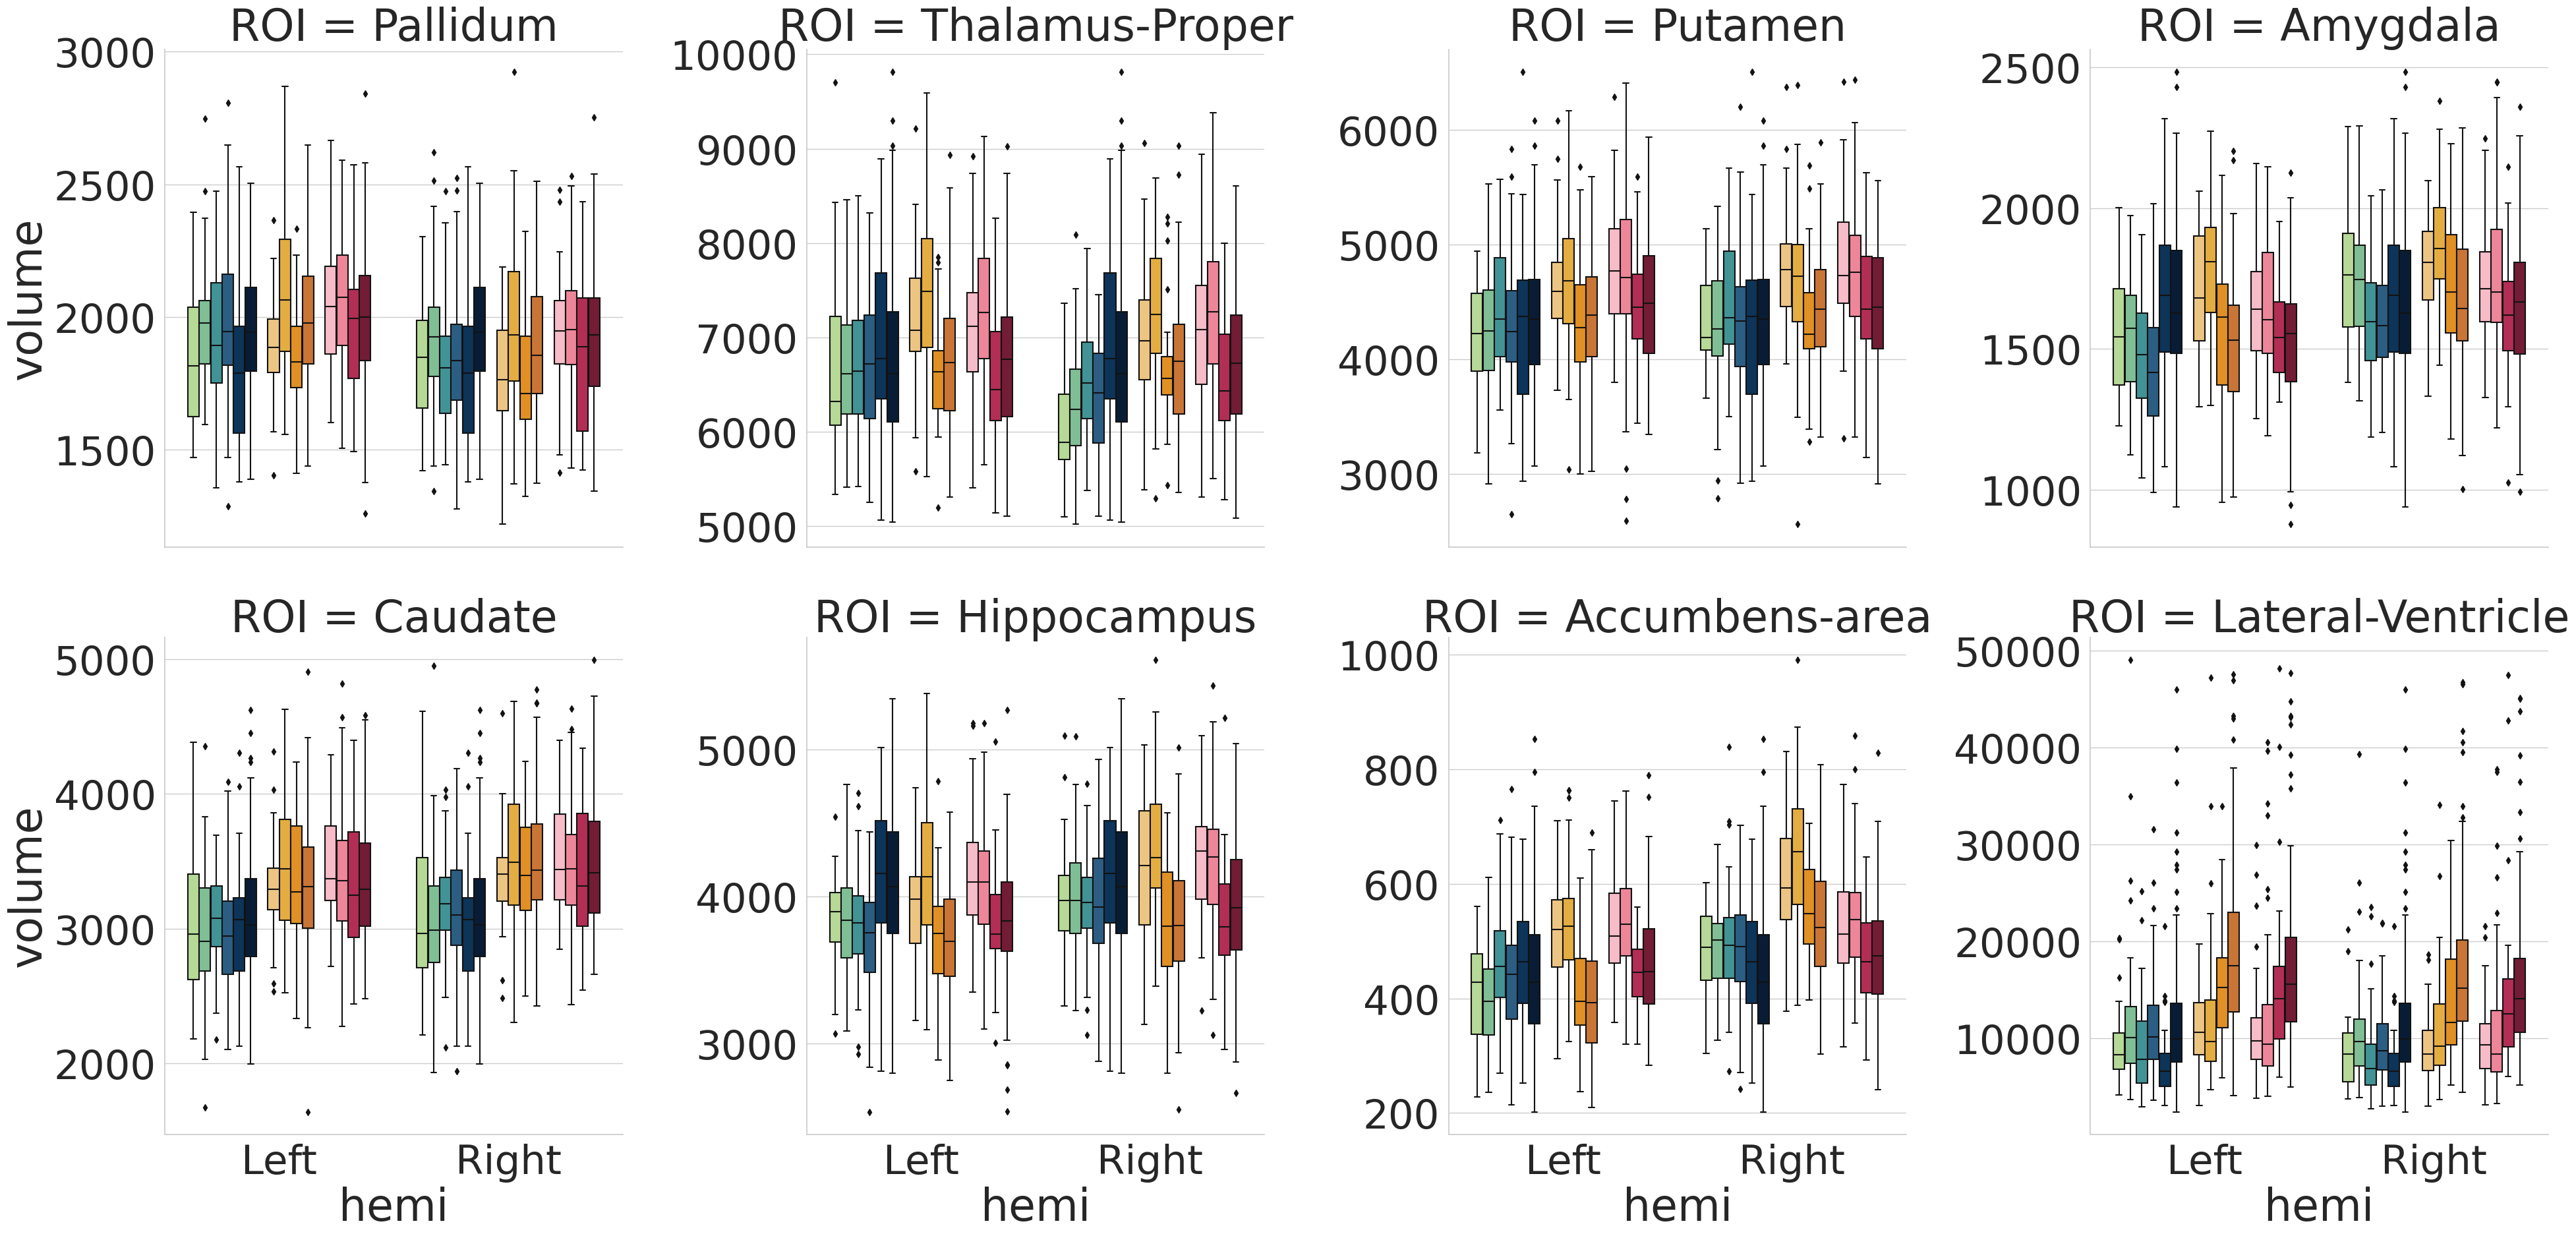

In [57]:
save_fig = True

# hemi_ASEG_df = hemi_ASEG_df[hemi_ASEG_df["dataset"].isin(["PPMI", "QPN", "NIMHANS_SERB"])]
hemi_ASEG_df = hemi_ASEG_df[hemi_ASEG_df["group"].isin(["control", "PD"])]

vol_ASEG_df_melt = hemi_ASEG_df.melt(
    id_vars=demo_cols + ["ds_group","ds_hemi"],
    var_name="ROI", 
    value_name="volume",
)

plot_df = vol_ASEG_df_melt.copy()
plot_df = plot_df.drop(columns=["participant_id"])
plot_df["hemi"] = plot_df["hemi"].replace({"lh":"Left", "rh":"Right"})
plot_df["ROI"] = plot_df["ROI"].astype(str)
hemi_roi_list = ['Pallidum', 'Thalamus-Proper', 'Putamen',  'Amygdala', 'Caudate', 'Hippocampus', 'Accumbens-area', 
                 'Lateral-Ventricle']
#'Cerebellum-Cortex','Cerebellum-White-Matter','VentralDC','Inf-Lat-Vent'

color_list = [  my_colors.NIM_SERB_CONTROL.value, my_colors.NIM_SERB_PD.value,
                my_colors.NIM_METAL_CONTROL.value, my_colors.NIM_METAL_PD.value,
                my_colors.NIM_YLO_CONTROL.value, my_colors.NIM_YLO_PD.value,
                "white",
                my_colors.QPN_CONTROL.value, my_colors.QPN_PD.value, 
                my_colors.QPN_older_CONTROL.value, my_colors.QPN_older_PD.value,
                "white",
                my_colors.PPMI_CONTROL.value, my_colors.PPMI_PD.value,
                my_colors.PPMI_older_CONTROL.value, my_colors.PPMI_older_PD.value              
              ]

palette_whilte_offset = sns.color_palette(palette=color_list)

hue_order = ["NIMHANS-1-control", "NIMHANS-1-PD", "NIMHANS-2-control", "NIMHANS-2-PD", 
             "NIMHANS-3-control", "NIMHANS-3-PD", "",
             "QPN-young-control", "QPN-young-PD", "QPN-older-control", "QPN-older-PD", "",
             "PPMI-young-control",  "PPMI-young-PD","PPMI-older-control",  "PPMI-older-PD"] 

sns.set_theme(font_scale=4)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y="volume",x="hemi", hue="ds_group", col="ROI",kind="box", col_wrap=4, col_order=hemi_roi_list, 
                    hue_order=hue_order, palette=palette_whilte_offset, 
                    data=plot_df, aspect=1, height=10, sharey=False, legend=False)
    # g.tick_params(axis='x', rotation=90, labelsize=14)

if save_fig:
    g.savefig(f"{figs_dir}/ASEG_hemi.png")
    print(f"Saving figure to {figs_dir}/ASEG_hemi.png")

### Global volumes

In [58]:
FS_version_name_map = {
    "SupraTentorialVol": "SupraTentorial",
    "TotalGrayVol": "TotalGray",
    "SubCortGrayVol": "SubCortGray",
    "EstimatedTotalIntraCranialVol": "EstimatedTotalIntraCranial",
}

In [60]:
# NIMHANS (SERB + METAL)
nimhans_serb_global_ASEG_df = pd.read_csv(f"{nimhans_serb_agg_data_dir}{global_vol_csv}").drop(columns=["Unnamed: 0"])
nimhans_serb_global_ASEG_df["ds"] = "NIMHANS-1"
n_nimhans_serb_participants = len(nimhans_serb_global_ASEG_df["participant_id"].unique())

nimhans_metal_global_ASEG_df = pd.read_csv(f"{nimhans_metal_agg_data_dir}{global_vol_csv}").drop(columns=["Unnamed: 0"])
nimhans_metal_global_ASEG_df["ds"] = "NIMHANS-2"
n_nimhans_metal_participants = len(nimhans_metal_global_ASEG_df["participant_id"].unique())

nimhans_ylo_global_ASEG_df = pd.read_csv(f"{nimhans_ylo_agg_data_dir}{global_vol_csv}") #.drop(columns=["Unnamed: 0"])
nimhans_ylo_global_ASEG_df["ds"] = "NIMHANS-3"
n_nimhans_ylo_participants = len(nimhans_ylo_global_ASEG_df["participant_id"].unique())
# rename cols
# TODO need to update this for other datasets
nimhans_ylo_global_ASEG_df = nimhans_ylo_global_ASEG_df.rename(columns=FS_version_name_map)



# QPN
qpn_global_ASEG_df = pd.read_csv(f"{qpn_agg_data_dir}{global_vol_csv}") #.drop(columns=["Unnamed: 0"])
## Reanme eTIV col
qpn_global_ASEG_df = qpn_global_ASEG_df.rename(columns={"EstimatedTotalIntraCranialVol":"EstimatedTotalIntraCranial"})
qpn_global_ASEG_df["ds"] = "QPN"
n_qpn_participants = len(qpn_global_ASEG_df["participant_id"].unique())

# PPMI
ppmi_global_ASEG_df = pd.read_csv(f"{ppmi_agg_data_dir}{global_vol_csv}").drop(columns=["Unnamed: 0"])
ppmi_global_ASEG_df["ds"] = "PPMI"
n_ppmi_participants = len(ppmi_global_ASEG_df["participant_id"].unique())

print(f"n_nimhans_participants: {(n_nimhans_serb_participants, n_nimhans_metal_participants)}, n_qpn_participants:{n_qpn_participants}")


if match_age:
    print(f"Matching age < {age_thresh}")

    ppmi_younger_global_ASEG_df = ppmi_global_ASEG_df[ppmi_global_ASEG_df["age"] < age_thresh].copy()
    ppmi_younger_global_ASEG_df["ds"] = "PPMI-young"
    n_younger_ppmi_participants = len(ppmi_younger_global_ASEG_df["participant_id"].unique())

    ppmi_older_global_ASEG_df = ppmi_global_ASEG_df[ppmi_global_ASEG_df["age"] >= age_thresh].copy()
    ppmi_older_global_ASEG_df["ds"] = "PPMI-older"
    n_older_ppmi_participants = len(ppmi_older_global_ASEG_df["participant_id"].unique())

    qpn_younger_global_ASEG_df = qpn_global_ASEG_df[qpn_global_ASEG_df["age"] < age_thresh].copy()
    qpn_younger_global_ASEG_df["ds"] = "QPN-young"
    n_qpn_younger_participants = len(qpn_younger_global_ASEG_df["participant_id"].unique())

    qpn_older_global_ASEG_df = qpn_global_ASEG_df[qpn_global_ASEG_df["age"] >= age_thresh].copy()
    qpn_older_global_ASEG_df["ds"] = "QPN-older"
    n_qpn_older_participants = len(qpn_older_global_ASEG_df["participant_id"].unique())

    print(f"n_nimhans_participants: {(n_nimhans_serb_participants,n_nimhans_metal_participants, n_nimhans_ylo_participants)}")
    print(f"n_qpn_younger_participants:{n_qpn_younger_participants}, n_qpn_older_participants: {n_qpn_older_participants}")
    print(f"n_ppmi_younger_participants:{n_younger_ppmi_participants}, n_ppmi_older_participants: {n_older_ppmi_participants}")

# Concat
global_vol_ASEG_df = pd.concat([nimhans_serb_global_ASEG_df, nimhans_metal_global_ASEG_df, nimhans_ylo_global_ASEG_df,
                          qpn_younger_global_ASEG_df, qpn_older_global_ASEG_df,
                          ppmi_younger_global_ASEG_df, ppmi_older_global_ASEG_df], axis=0)

global_vol_ASEG_df["ds_group"] = global_vol_ASEG_df["ds"] + "-" + global_vol_ASEG_df["group"]

global_vol_ASEG_df = global_vol_ASEG_df[global_vol_ASEG_df["group"]!="prodromal"] .copy()

print(f"global_vol_ASEG_df shape: {global_vol_ASEG_df.shape}")

## tmp
# qpn_global_ASEG_df = qpn_global_ASEG_df.drop(columns=["participant_id"])

qpn_global_ASEG_df.head()

n_nimhans_participants: (86, 130), n_qpn_participants:287
Matching age < 63
n_nimhans_participants: (86, 130, 237)
n_qpn_younger_participants:95, n_qpn_older_participants: 166
n_ppmi_younger_participants:195, n_ppmi_older_participants: 210
global_vol_ASEG_df shape: (1022, 48)


,3rd-Ventricle,4th-Ventricle,5th-Ventricle,Brain-Stem,BrainSeg,BrainSegNotVent,CC_Anterior,CC_Central,CC_Mid_Anterior,CC_Mid_Posterior,...,Mask,MaskVol-to-eTIV,BrainSegVol-to-eTIV,SurfaceHoles,participant_id,age,sex,group,hemi,ds
0,1360.3,1787.4,0.0,25180.7,1268014.0,1241132.0,1322.0,531.8,648.6,684.7,...,1561089.0,0.919697,0.747035,7,MNI0028,60.19,M,PD,global,QPN
1,2976.9,2691.0,0.0,20471.7,1250678.0,1160664.0,1011.1,445.4,491.8,466.4,...,1599308.0,0.876686,0.685579,26,MNI0056,79.24,M,PD,global,QPN
2,1429.2,988.4,0.0,27453.5,1250635.0,1233803.0,768.3,756.6,578.4,523.3,...,1603655.0,0.971572,0.757695,44,MNI0058,57.43,M,PD,global,QPN
3,1348.8,1599.4,0.0,20654.2,1063409.0,1037897.0,854.4,420.8,705.6,486.9,...,1371644.0,0.915154,0.709501,11,MNI0068,69.30,M,PD,global,QPN
4,952.4,1449.5,0.0,21743.1,1144991.0,1131912.0,930.8,801.1,797.4,507.2,...,1447415.0,0.941479,0.744766,15,MNI0079,50.08,F,PD,global,QPN


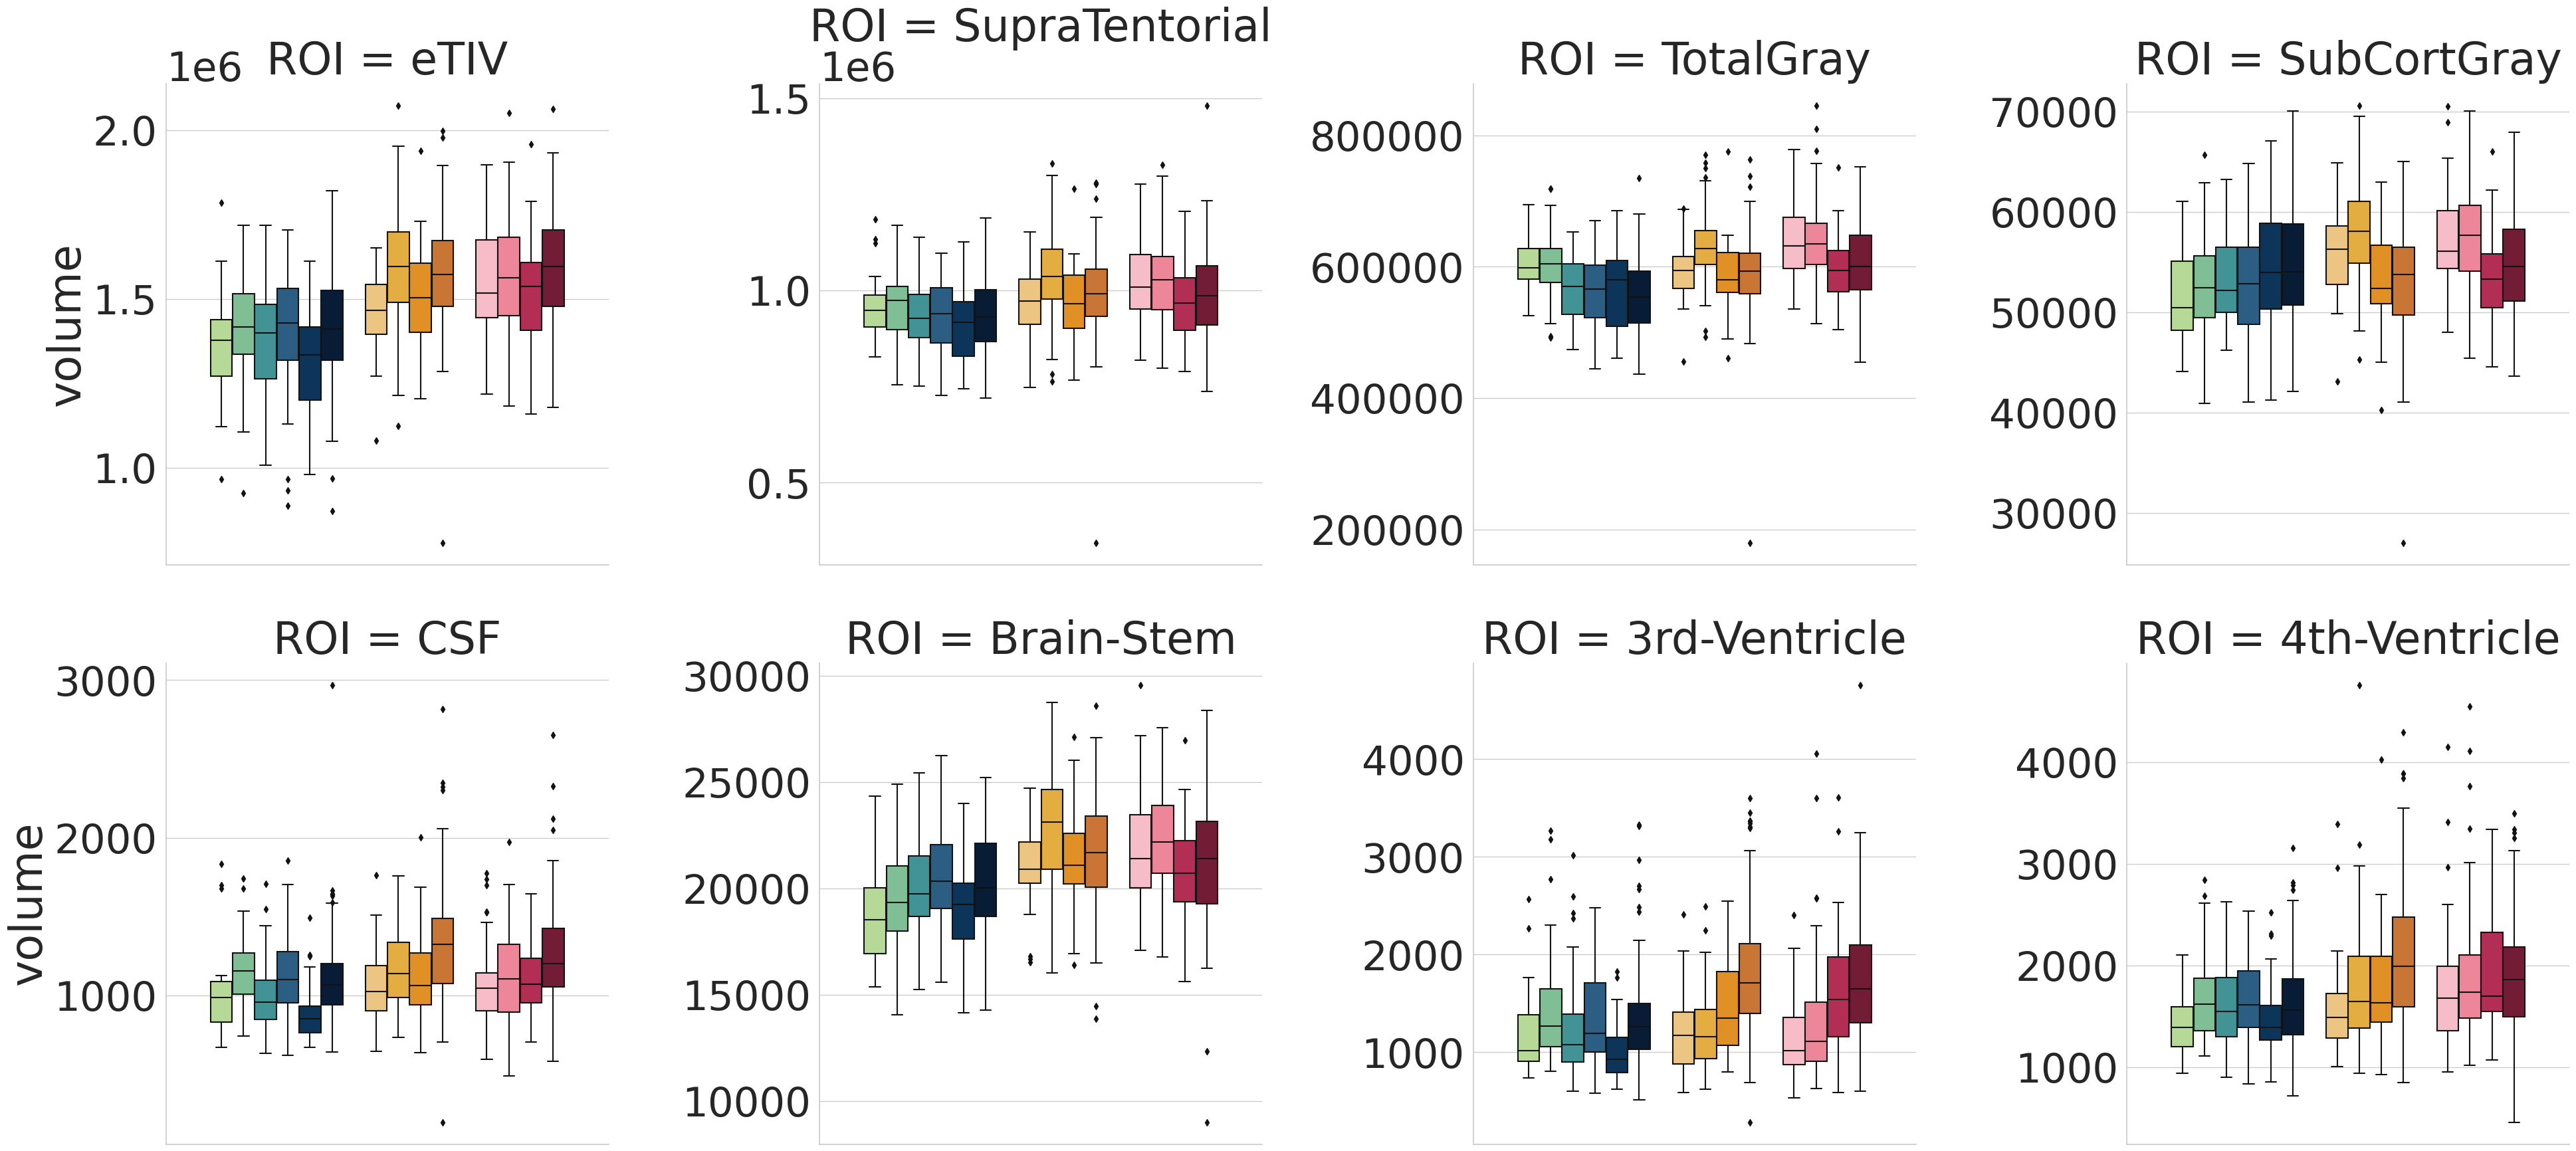

In [67]:
save_fig = False

global_roi_list = ["eTIV", "SupraTentorial", "TotalGray", "SubCortGray", 
                    "CSF","Brain-Stem","3rd-Ventricle","4th-Ventricle"]

# global_vol_ASEG_df = global_vol_ASEG_df[global_vol_ASEG_df["dataset"].isin(["PPMI", "QPN","NIMHANS_SERB"])]

global_vol_ASEG_df = global_vol_ASEG_df[global_vol_ASEG_df["group"].isin(["control", "PD"])]

global_vol_ASEG_df = global_vol_ASEG_df.rename(columns={"EstimatedTotalIntraCranial":"eTIV"})

global_vol_ASEG_df = global_vol_ASEG_df[demo_cols + ["ds_group"] + global_roi_list].copy()

global_vol_ASEG_df_melt = global_vol_ASEG_df.melt(
    id_vars=demo_cols+["ds_group"],
    var_name="ROI", 
    value_name="volume",
)

global_vol_ASEG_df_melt["ROI"] = global_vol_ASEG_df_melt["ROI"].astype(str)

plot_df = global_vol_ASEG_df_melt.copy()

plot_df = plot_df[plot_df["ROI"].isin(global_roi_list)]

color_list = [  my_colors.NIM_SERB_CONTROL.value, my_colors.NIM_SERB_PD.value,
                my_colors.NIM_METAL_CONTROL.value, my_colors.NIM_METAL_PD.value,
                my_colors.NIM_YLO_CONTROL.value, my_colors.NIM_YLO_PD.value,
                "white",
                my_colors.QPN_CONTROL.value, my_colors.QPN_PD.value, 
                my_colors.QPN_older_CONTROL.value, my_colors.QPN_older_PD.value,
                "white",
                my_colors.PPMI_CONTROL.value, my_colors.PPMI_PD.value,
                my_colors.PPMI_older_CONTROL.value, my_colors.PPMI_older_PD.value              
              ]

palette = sns.color_palette(palette=color_list)

hue_order = ["NIMHANS-1-control", "NIMHANS-1-PD", "NIMHANS-2-control", "NIMHANS-2-PD", 
             "NIMHANS-3-control", "NIMHANS-3-PD", "",
             "QPN-young-control", "QPN-young-PD", "QPN-older-control", "QPN-older-PD", "",
             "PPMI-young-control",  "PPMI-young-PD","PPMI-older-control",  "PPMI-older-PD"] 

sns.set_theme(font_scale=4)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y="volume",x="hemi", hue="ds_group", col="ROI", kind="box", col_wrap=4, 
                    col_order=global_roi_list, 
                    hue_order=hue_order,
                    palette=palette, data=plot_df, aspect=1, height=10, sharey=False, legend=False)
    
    # plt.legend(bbox_to_anchor =(-0.15,2.5), loc='lower center',ncol=7, fontsize=40)
    g.set_xlabels("")
    g.set_xticklabels("")

if save_fig:
    g.savefig(f"{figs_dir}/ASEG_global.png")
    print(f"Saving figure to {figs_dir}/ASEG_global.png")

### Demographics

In [68]:
demo_df = global_vol_ASEG_df[demo_cols].copy()
demo_df.groupby(["ds","group"]).count()

participant_id  bids_id  age  sex  hemi
ds         group                                           
NIMHANS-1  PD                   64       64   54   55    64
           control              22       22   15   15    22
NIMHANS-2  PD                   66       66   59   59    66
           control              64       64   64   64    64
NIMHANS-3  PD                  198      198  198  198   198
           control              39       39   37   38    39
PPMI-older PD                  124        0  124  124   124
           control              37        0   37   37    37
PPMI-young PD                  105        0  105  105   105
           control              42        0   42   42    42
QPN-older  PD                  131        0  131  128   131
           control              35        0   35   34    35
QPN-young  PD                   68        0   68   66    68
           control              27        0   27   25    27

In [70]:
# demo_df.groupby(["ds","group", "sex"])["age"].describe()
demo_df.groupby(["ds","group"])["age"].describe()

count       mean        std    min      25%    50%  \
ds         group                                                         
NIMHANS-1  PD        54.0  55.388889   7.199100  36.00  50.2500  56.00   
           control   15.0  52.000000   6.011893  41.00  49.0000  53.00   
NIMHANS-2  PD        59.0  53.644068  10.133187  24.00  46.0000  55.00   
           control   64.0  50.015625  10.418988  20.00  42.7500  50.00   
NIMHANS-3  PD       198.0  54.075758  10.983574  23.00  47.2500  55.00   
           control   37.0  44.148649  11.493274  25.00  35.0000  46.00   
PPMI-older PD       124.0  69.516129   4.591409  63.00  65.0000  69.00   
           control   37.0  68.972973   5.041420  63.00  65.0000  68.00   
PPMI-young PD       105.0  54.247619   5.705566  38.00  50.0000  55.00   
           control   42.0  51.642857   7.938242  31.00  46.2500  53.50   
QPN-older  PD       131.0  70.829695   5.541496  63.23  65.9750  69.54   
           control   35.0  70.032571   4.917366  63.14  66.9350  68.56   
QPN-young  PD        68.0  55.809559   4.971906  40.83  53.0375  56.33   
           control   27.0  51.308519   9.071232  25.98  45.8050  53.64   

                       75%    max  
ds         group                   
NIMHANS-1  PD       61.000  67.00  
           control  56.500  60.00  
NIMHANS-2  PD       61.000  72.00  
           control  57.250  73.00  
NIMHANS-3  PD       62.000  78.00  
           control  52.000  65.00  
PPMI-older PD       73.000  82.00  
           control  72.000  81.00  
PPMI-young PD       59.000  62.00  
           control  57.750  62.00  
QPN-older  PD       74.580  88.34  
           control  71.640  82.84  
QPN-young  PD       59.875  62.64  
           control  58.375  62.72

### OLS

In [71]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [72]:
stat_df = global_vol_ASEG_df.copy()
dataset_list = ["NIMHANS-1","NIMHANS-2"]
hemi = "global"
stat_df = stat_df[(stat_df["ds"].isin(dataset_list)) & (stat_df["hemi"]==hemi)]

brain_var = "eTIV"
demo_vars = ["participant_id","age","sex","group","hemi","ds"]

input_var = demo_vars + [brain_var]

stat_df = stat_df[input_var]
stat_df.head()

,participant_id,age,sex,group,hemi,ds,eTIV
0,SERB088,54.0,M,PD,global,NIMHANS-1,1.426910e+06
1,SERB058,64.0,M,PD,global,NIMHANS-1,1.296458e+06
2,SERB049,62.0,M,PD,global,NIMHANS-1,1.566405e+06
3,SERB084,NaN,NaN,PD,global,NIMHANS-1,1.213594e+06
4,SERB063,56.0,M,PD,global,NIMHANS-1,1.264406e+06


In [73]:
def get_stats(stat_df, ind_var, dep_var, cat_vars, global_correction=False):
    cvar_str = ""
    for cvar in cat_vars:
        cvar_str = "".join([f"{cvar_str} + C({cvar})"])    

    if global_correction:
        formula = f"{dep_var} ~ {ind_var}{cvar_str} + {global_correction}"
    else:
        formula = f"{dep_var} ~ {ind_var}{cvar_str}"
        
    print(f"formula: {formula}")
    res = smf.ols(formula=formula, data=stat_df).fit()
    coef_df = pd.DataFrame(columns=["coef"], data=res.params)
    tval_df = pd.DataFrame(columns=["tvalues"], data=res.tvalues)
    pval_df = pd.DataFrame(columns=["pvalues"], data=res.pvalues)
    res_df = pd.concat([coef_df, tval_df, pval_df], axis=1)
    res_df = res_df.reset_index().rename(columns={"index":"var"})

    return res_df, res, formula

### Replication analysis
- Group differences within each dataset

In [76]:
ind_var = "age"
cat_vars = ["sex", "group"]
dataset_list = ["NIMHANS-1","NIMHANS-2","NIMHANS-3","QPN-young","PPMI-young","QPN-older","PPMI-older"]

pval_thresh = 0.05

### Global volumes

In [77]:
brain_roi_list = ["eTIV", "SupraTentorial", "TotalGray", "SubCortGray", "CSF"]
hemi = "global"
res_df = pd.DataFrame()
for ds in dataset_list:
    for dep_var in brain_roi_list:
        print(f"ds:{ds}, ind_var:{ind_var}")
        stat_df = global_vol_ASEG_df.copy()
        stat_df = stat_df[(stat_df["ds"]==ds) & (stat_df["hemi"]==hemi)]
        _df, res, formula = get_stats(stat_df, ind_var, dep_var, cat_vars, global_correction=False)
        _df["ROI"] = dep_var
        _df["hemi"] = hemi
        _df["ds"] = ds
        res_df = pd.concat([res_df, _df], axis=0)


res_df[(res_df["var"]=="C(group)[T.control]") & (res_df["pvalues"] < pval_thresh)]

ds:NIMHANS-1, ind_var:age
formula: eTIV ~ age + C(sex) + C(group)
ds:NIMHANS-1, ind_var:age
formula: SupraTentorial ~ age + C(sex) + C(group)
ds:NIMHANS-1, ind_var:age
formula: TotalGray ~ age + C(sex) + C(group)
ds:NIMHANS-1, ind_var:age
formula: SubCortGray ~ age + C(sex) + C(group)
ds:NIMHANS-1, ind_var:age
formula: CSF ~ age + C(sex) + C(group)
ds:NIMHANS-2, ind_var:age
formula: eTIV ~ age + C(sex) + C(group)
ds:NIMHANS-2, ind_var:age
formula: SupraTentorial ~ age + C(sex) + C(group)
ds:NIMHANS-2, ind_var:age
formula: TotalGray ~ age + C(sex) + C(group)
ds:NIMHANS-2, ind_var:age
formula: SubCortGray ~ age + C(sex) + C(group)
ds:NIMHANS-2, ind_var:age
formula: CSF ~ age + C(sex) + C(group)
ds:NIMHANS-3, ind_var:age
formula: eTIV ~ age + C(sex) + C(group)
ds:NIMHANS-3, ind_var:age
formula: SupraTentorial ~ age + C(sex) + C(group)
ds:NIMHANS-3, ind_var:age
formula: TotalGray ~ age + C(sex) + C(group)
ds:NIMHANS-3, ind_var:age
formula: SubCortGray ~ age + C(sex) + C(group)
ds:NIMHANS-3

,var,coef,tvalues,pvalues,ROI,hemi,ds
2,C(group)[T.control],-116.604056,-2.981860,0.003476,CSF,global,NIMHANS-2
2,C(group)[T.control],-48619.887201,-2.007845,0.045824,eTIV,global,NIMHANS-3
2,C(group)[T.control],-120.820800,-2.741263,0.006599,CSF,global,NIMHANS-3
2,C(group)[T.control],-67228.782986,-2.033985,0.044999,eTIV,global,QPN-young
2,C(group)[T.control],-26688.759885,-2.212459,0.029554,TotalGray,global,QPN-young
2,C(group)[T.control],-66707.493628,-2.739367,0.006868,eTIV,global,PPMI-older
2,C(group)[T.control],-159.258495,-3.187139,0.001734,CSF,global,PPMI-older


### Subcortical volumes

In [78]:
brain_roi_list = ['Pallidum', 'ThalamusProper', 'Putamen',  'Amygdala', 'Caudate', 'Hippocampus', 'AccumbensArea']
hemi_list = ["lh", "rh"]
global_correction = "eTIV"
# rename columns with "-" to remove error in statsmodels
hemi_ASEG_df = hemi_ASEG_df.rename(columns={"Thalamus-Proper":"ThalamusProper", 'Accumbens-area':'AccumbensArea'})

res_dict = {}
res_df = pd.DataFrame()
for ds in dataset_list:
    for dep_var in brain_roi_list:
        for hemi in hemi_list:
            # print(f"ds:{ds}, ind_var:{ind_var}")
            stat_df = hemi_ASEG_df.copy()
            stat_df = stat_df[(stat_df["ds"]==ds) & (stat_df["hemi"]==hemi)].copy()

            if global_correction:
                stat_df = pd.merge(stat_df, global_vol_ASEG_df[["participant_id","eTIV"]], on="participant_id", how="left")
                _df, res, formula = get_stats(stat_df, ind_var, dep_var, cat_vars, global_correction)
            else:
                _df, res, formula = get_stats(stat_df, ind_var, dep_var, cat_vars)

            _df["ROI"] = dep_var
            _df["hemi"] = hemi
            _df["dataset"] = ds
            res_df = pd.concat([res_df, _df], axis=0)
            res_dict[(dep_var, hemi, ds)] = res


res_df[(res_df["var"]=="C(group)[T.control]") & (res_df["pvalues"] < pval_thresh)]

formula: Pallidum ~ age + C(sex) + C(group) + eTIV
formula: Pallidum ~ age + C(sex) + C(group) + eTIV
formula: ThalamusProper ~ age + C(sex) + C(group) + eTIV
formula: ThalamusProper ~ age + C(sex) + C(group) + eTIV
formula: Putamen ~ age + C(sex) + C(group) + eTIV
formula: Putamen ~ age + C(sex) + C(group) + eTIV
formula: Amygdala ~ age + C(sex) + C(group) + eTIV
formula: Amygdala ~ age + C(sex) + C(group) + eTIV
formula: Caudate ~ age + C(sex) + C(group) + eTIV
formula: Caudate ~ age + C(sex) + C(group) + eTIV
formula: Hippocampus ~ age + C(sex) + C(group) + eTIV
formula: Hippocampus ~ age + C(sex) + C(group) + eTIV
formula: AccumbensArea ~ age + C(sex) + C(group) + eTIV
formula: AccumbensArea ~ age + C(sex) + C(group) + eTIV
formula: Pallidum ~ age + C(sex) + C(group) + eTIV
formula: Pallidum ~ age + C(sex) + C(group) + eTIV
formula: ThalamusProper ~ age + C(sex) + C(group) + eTIV
formula: ThalamusProper ~ age + C(sex) + C(group) + eTIV
formula: Putamen ~ age + C(sex) + C(group) + e

,var,coef,tvalues,pvalues,ROI,hemi,dataset
2,C(group)[T.control],-122.241452,-2.411002,0.018988,Pallidum,lh,NIMHANS-1
2,C(group)[T.control],207.222988,2.389288,0.018466,ThalamusProper,rh,NIMHANS-2
2,C(group)[T.control],167.155257,2.103316,0.037599,Putamen,lh,NIMHANS-2
2,C(group)[T.control],184.405542,2.352978,0.020279,Putamen,rh,NIMHANS-2
2,C(group)[T.control],145.561157,2.450335,0.015765,Caudate,lh,NIMHANS-2
2,C(group)[T.control],124.565365,2.184410,0.030944,Hippocampus,lh,NIMHANS-2
2,C(group)[T.control],-167.898868,-4.559717,0.000008,Pallidum,lh,NIMHANS-3
2,C(group)[T.control],-167.898868,-4.559717,0.000008,Pallidum,rh,NIMHANS-3
2,C(group)[T.control],300.885131,2.442145,0.016673,Putamen,rh,QPN-young
2,C(group)[T.control],-54.644248,-2.264983,0.026057,AccumbensArea,rh,QPN-young


### Compare older and younger groups

In [79]:
global_correction = "eTIV"
ind_var = "age"
cat_vars = ["sex", "ds", "group"]

res_df = pd.DataFrame()

for dep_var in brain_roi_list:
    for hemi in hemi_list:
        # print(f"ds:{ds}, ind_var:{ind_var}")
        stat_df = hemi_ASEG_df.copy()
        stat_df = stat_df[stat_df["ds"].isin(["PPMI-young","PPMI-older"])].copy()
        stat_df = stat_df[(stat_df["hemi"]==hemi)].copy()

        if global_correction:
            stat_df = pd.merge(stat_df, global_vol_ASEG_df[["participant_id","eTIV"]], on="participant_id", how="left")
            _df, _, formula = get_stats(stat_df, ind_var, dep_var, cat_vars, global_correction)
        else:
            _df, _, formula = get_stats(stat_df, ind_var, dep_var, cat_vars)

        _df["ROI"] = dep_var
        _df["hemi"] = hemi
        # _df["dataset"] = ds
        res_df = pd.concat([res_df, _df], axis=0)

formula: Pallidum ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: Pallidum ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: ThalamusProper ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: ThalamusProper ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: Putamen ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: Putamen ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: Amygdala ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: Amygdala ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: Caudate ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: Caudate ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: Hippocampus ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: Hippocampus ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: AccumbensArea ~ age + C(sex) + C(ds) + C(group) + eTIV
formula: AccumbensArea ~ age + C(sex) + C(ds) + C(group) + eTIV


In [80]:
res_df[(res_df["pvalues"] < pval_thresh)]

,var,coef,tvalues,pvalues,ROI,hemi
0,Intercept,1243.346298,5.904056,9.649404e-09,Pallidum,lh
4,age,-7.752355,-3.417125,7.208738e-04,Pallidum,lh
5,eTIV,0.000822,8.277823,4.263559e-15,Pallidum,lh
0,Intercept,1133.679144,5.931948,8.239138e-09,Pallidum,rh
4,age,-8.040097,-3.894832,1.211886e-04,Pallidum,rh
5,eTIV,0.000847,9.390185,1.563335e-18,Pallidum,rh
0,Intercept,5034.150479,10.078138,9.523662e-21,ThalamusProper,lh
4,age,-44.398500,-8.250710,5.129329e-15,ThalamusProper,lh
5,eTIV,0.003098,13.159743,1.709626e-31,ThalamusProper,lh
0,Intercept,4201.971595,8.606518,4.304345e-16,ThalamusProper,rh


### CTh

In [81]:
brain_roi_list = CT_DKT_df[CT_DKT_df.columns[~CT_DKT_df.columns.isin(demo_cols + ["ds_group","ds_hemi"])]].columns
print(f"n_brain_rois: {len(brain_roi_list)}")
hemi_list = ["lh", "rh"]

res_df = pd.DataFrame()
for ds in dataset_list:
    for dep_var in brain_roi_list:
        for hemi in hemi_list:
            # print(f"ds:{ds}, ind_var:{ind_var}")
            stat_df = CT_DKT_df.copy()
            stat_df = stat_df[(stat_df["ds"]==ds) & (stat_df["hemi"]==hemi)]
            _df, _, formula = get_stats(stat_df, ind_var, dep_var, cat_vars)
            _df["ROI"] = dep_var
            _df["hemi"] = hemi
            _df["ds"] = ds
            res_df = pd.concat([res_df, _df], axis=0)


res_df[(res_df["var"]=="C(group)[T.control]") & (res_df["pvalues"] < pval_thresh)]

n_brain_rois: 33
formula: caudalanteriorcingulate ~ age + C(sex) + C(ds) + C(group)
formula: caudalanteriorcingulate ~ age + C(sex) + C(ds) + C(group)
formula: caudalmiddlefrontal ~ age + C(sex) + C(ds) + C(group)
formula: caudalmiddlefrontal ~ age + C(sex) + C(ds) + C(group)
formula: cuneus ~ age + C(sex) + C(ds) + C(group)
formula: cuneus ~ age + C(sex) + C(ds) + C(group)
formula: entorhinal ~ age + C(sex) + C(ds) + C(group)
formula: entorhinal ~ age + C(sex) + C(ds) + C(group)
formula: fusiform ~ age + C(sex) + C(ds) + C(group)
formula: fusiform ~ age + C(sex) + C(ds) + C(group)
formula: inferiorparietal ~ age + C(sex) + C(ds) + C(group)
formula: inferiorparietal ~ age + C(sex) + C(ds) + C(group)
formula: inferiortemporal ~ age + C(sex) + C(ds) + C(group)
formula: inferiortemporal ~ age + C(sex) + C(ds) + C(group)
formula: insula ~ age + C(sex) + C(ds) + C(group)
formula: insula ~ age + C(sex) + C(ds) + C(group)
formula: isthmuscingulate ~ age + C(sex) + C(ds) + C(group)
formula: is

,var,coef,tvalues,pvalues,ROI,hemi,ds
2,C(group)[T.control],-1.333828e-01,-2.094447,4.012301e-02,posteriorcingulate,rh,NIMHANS-1
2,C(group)[T.control],6.773591e-02,2.717475,7.560586e-03,parstriangularis,lh,NIMHANS-2
2,C(group)[T.control],6.411406e-02,2.403827,1.701349e-02,caudalmiddlefrontal,lh,NIMHANS-3
2,C(group)[T.control],1.132538e-01,1.971228,4.989153e-02,entorhinal,rh,NIMHANS-3
2,C(group)[T.control],7.989893e-02,3.147406,1.864124e-03,fusiform,lh,NIMHANS-3
2,C(group)[T.control],6.605479e-02,2.288924,2.298734e-02,fusiform,rh,NIMHANS-3
2,C(group)[T.control],8.010733e-02,2.981134,3.179182e-03,inferiortemporal,lh,NIMHANS-3
2,C(group)[T.control],8.852670e-02,3.393618,8.115820e-04,inferiortemporal,rh,NIMHANS-3
2,C(group)[T.control],7.141614e-02,2.800759,5.530132e-03,middletemporal,lh,NIMHANS-3
2,C(group)[T.control],1.007530e-01,3.928365,1.129836e-04,middletemporal,rh,NIMHANS-3


### Cross-cohort comparisons

In [36]:
brain_roi_list = ["eTIV", "SupraTentorial", "TotalGray", "SubCortGray", "CSF"]
ind_var = "age"
cat_vars = ["sex", "ds_group"]
pval_thresh = 0.05

group_list = ["control","PD"]
hemi = "global"
res_df = pd.DataFrame()
for grp in group_list:
    for dep_var in brain_roi_list:
        # print(f"ds:{ds}, ind_var:{ind_var}")
        stat_df = global_vol_ASEG_df.copy()
        stat_df = stat_df[(stat_df["group"]==grp) & (stat_df["hemi"]==hemi)]
        _df, _, formula = get_stats(stat_df, ind_var, dep_var, cat_vars)
        _df["ROI"] = dep_var
        _df["hemi"] = hemi
        _df["group"] = grp
        res_df = pd.concat([res_df, _df], axis=0)


res_df[(~res_df["var"].isin(["Intercept","C(sex)[T.M]","age"])) & (res_df["pvalues"] < pval_thresh)]

formula: eTIV ~ age + C(sex) + C(ds_group)
formula: SupraTentorial ~ age + C(sex) + C(ds_group)


formula: TotalGray ~ age + C(sex) + C(ds_group)
formula: SubCortGray ~ age + C(sex) + C(ds_group)
formula: CSF ~ age + C(sex) + C(ds_group)
formula: eTIV ~ age + C(sex) + C(ds_group)
formula: SupraTentorial ~ age + C(sex) + C(ds_group)
formula: TotalGray ~ age + C(sex) + C(ds_group)
formula: SubCortGray ~ age + C(sex) + C(ds_group)
formula: CSF ~ age + C(sex) + C(ds_group)


,var,coef,tvalues,pvalues,ROI,hemi,group
3,C(ds_group)[T.PPMI-older-control],143468.775682,3.291355,1.192998e-03,eTIV,global,control
4,C(ds_group)[T.PPMI-young-control],217318.535268,5.666676,5.467275e-08,eTIV,global,control
5,C(ds_group)[T.QPN-older-control],163145.676866,3.369747,9.147508e-04,eTIV,global,control
6,C(ds_group)[T.QPN-young-control],204205.302583,4.173749,4.596517e-05,eTIV,global,control
4,C(ds_group)[T.PPMI-young-control],77831.391915,3.203691,1.596515e-03,SupraTentorial,global,control
6,C(ds_group)[T.QPN-young-control],65783.451421,2.122463,3.512198e-02,SupraTentorial,global,control
2,C(ds_group)[T.NIMHANS-2-control],-37252.539224,-3.023130,2.854800e-03,TotalGray,global,control
4,C(ds_group)[T.PPMI-young-control],33705.441944,2.596574,1.016843e-02,TotalGray,global,control
3,C(ds_group)[T.PPMI-older-control],5036.882335,3.619566,3.802884e-04,SubCortGray,global,control
4,C(ds_group)[T.PPMI-young-control],6488.555502,5.299769,3.259795e-07,SubCortGray,global,control


In [40]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ThalamusProper   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     25.66
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           2.61e-15
Time:                        13:15:02   Log-Likelihood:                -929.55
No. Observations:                 123   AIC:                             1869.
Df Residuals:                     118   BIC:                             1883.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4420.5298    472.369      9.358      0.000    3485.112    5355.948
C(sex)[T.M]           -58.6098    126.904     -0.462      0.645    -309.913     192.694
C(group)[T.control]   207.2230     86.730      2.389      0.018      35.474     378.972
age                   -22.4070      4.210     -5.323      0.000     -30.744     -14.070
eTIV                    0.0023      0.000      6.818      0.000       0.002       0.003
==============================================================================
Omnibus:                        1.570   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.283
Skew:                           0.248   Prob(JB):                        0.526
Kurtosis:                       3.068   Cond. No.                     1.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""